# Prediction using Supervised ML

### Linear Regression - For the below task, we will use Linear Regression to predict the Percentage that a Student can score based on the No. of Hours they have studied.

### Shalaka Arekar

In [1]:
## Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
## Read data into dataframe
task_url = "http://bit.ly/w-data"
task_data=pd.read_csv(task_url)
task_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
print("Datatypes -")
print(task_data.dtypes)
print("--------------------")
print("Shape -")
print(task_data.shape)
print("-----------------------")
print("Description -")
print(task_data.describe())

Datatypes -
Hours     float64
Scores      int64
dtype: object
--------------------
Shape -
(25, 2)
-----------------------
Description -
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


## Assumption 1 - That there should be no outliers in the data and the same can be checked using the boxplot.

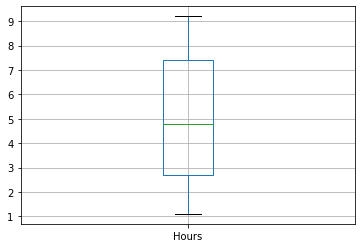

In [4]:
# Checking for outliers
task_data.boxplot(column="Hours")                                                          # No outliers

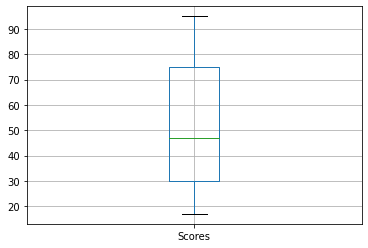

In [5]:
task_data.boxplot(column="Scores")                                                            # No outliers

## Assumption 2 (Assumption of Linearity) - Every Independent variable should have a linear relationship with the dependent variable and the same can be checked using the pairplot.

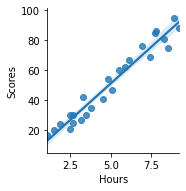

In [6]:
sns.pairplot(task_data,x_vars=["Hours"],y_vars="Scores",kind='reg')

### From the graph above, we can conclude that there is a positive linear relation between the No of hours studied and percentage of scored.

In [7]:
## Create X (X for those who satisfies the assumption of linearity ) and Y
X = task_data.iloc[:, :-1].values  
Y = task_data.iloc[:, 1].values  

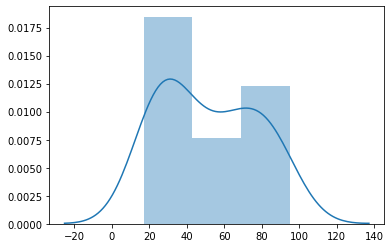

In [8]:
sns.distplot(Y,hist=True)       ## Normal distribution graph   

### If the Assumption of Normality does not hold, then we log transform the data. 
### If there are peaks in the data then to normalize the data, we do the log transform of the data.

### In the above example, log transformation is not required.
### We should not perform the log transformation unnecessarily.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029EB9464408>,
      dtype=object)

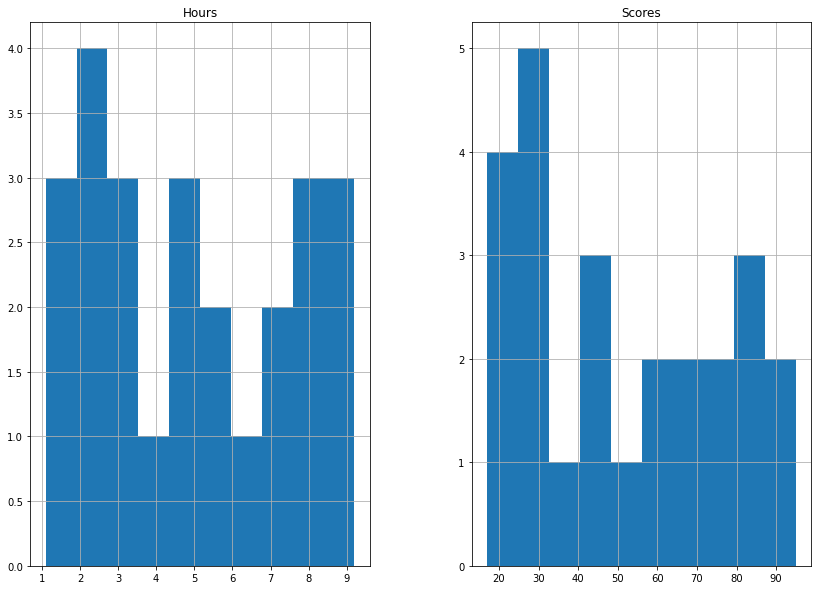

In [9]:
task_data.hist(figsize=(14,10))     

#### X and Y are normally distributed

## Assumption of Multi-Colinearity (inter - dependency)  -- There should be no Multi-colinearity in the data

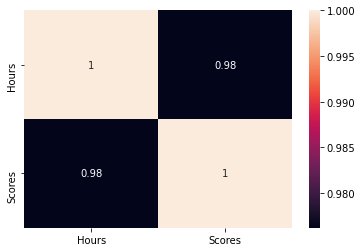

In [10]:
sns.heatmap(task_data.corr(),annot=True)

In [11]:
task_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Hours and Scores are highly positively correlated to each other.

## Implementing Linear Regression Model

In [12]:
from sklearn.model_selection import train_test_split

## Split the train and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression
## Create a model object
lm=LinearRegression()
## Train the model object
lm.fit(X_train,Y_train)

## Print the intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

## Pair the feature names with the coefficients
print(list(zip(lm.coef_)))

2.370815382341881
[9.78856669]
[(9.788566686749046,)]


## Predict using the Model

In [14]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [15]:
new_task_data=pd.DataFrame()
new_task_data=X_test

In [16]:
new_task_data=pd.DataFrame({'Actual Score':Y_test,'Predicted Score':Y_pred})
new_task_data

,Actual Score,Predicted Score
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


## Visualizing Training and Testing Data

Text(0, 0.5, 'Ylabel')

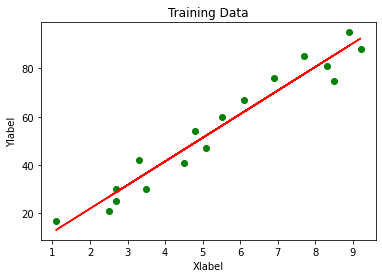

In [17]:
plt.scatter(X_train,Y_train,color='green')
plt.plot(X_train,lm.predict(X_train),color='red')
plt.title(('Training Data'))
plt.xlabel('Xlabel')
plt.ylabel('Ylabel')

Text(0, 0.5, 'Ylabel')

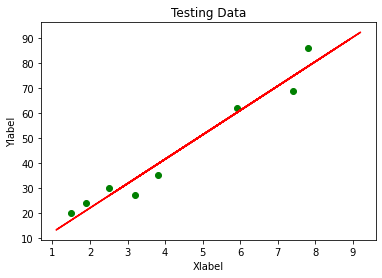

In [18]:
plt.scatter(X_test,Y_test,color='green')
plt.plot(X_train,lm.predict(X_train),color='red')
plt.title(('Testing Data'))
plt.xlabel('Xlabel')
plt.ylabel('Ylabel')

### R-sqaured(R2) is statistical measure that represents the proportion of the variance for a dependent variable that is explained by an independent variable or variables in a regression model.
### Higher the R-Sqaured value,higher the performance of the model.

In [19]:
r2=r2_score(Y_test,Y_pred)
print(r2)

0.9568211104435257


### The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.

In [20]:
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

4.792191274636315


### The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. 

In [21]:
adjusted_r_squared=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.9549437674193312


### You can test your own data too

In [22]:
hours = [[9.25]]
own_pred = lm.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.91505723477056
